<a href="https://colab.research.google.com/github/kenhuangsy/learning-tensorflow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

## Get the data

The images we're working with are from the food101 dataset (101 different classes of food). However, we modified it to only use two classes (pizza and steak)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-10-04 22:42:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   186MB/s    in 0.6s    

2022-10-04 22:42:45 (186 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. 

And for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  4 22:13 .
drwxr-xr-x 1 root root 4096 Oct  4 22:42 ..
drwxr-xr-x 4 root root 4096 Oct  4 22:13 test
drwxr-xr-x 4 root root 4096 Oct  4 22:13 train


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  4 22:13 .
drwxr-xr-x 1 root root 4096 Oct  4 22:42 ..
drwxr-xr-x 4 root root 4096 Oct  4 22:13 test
drwxr-xr-x 4 root root 4096 Oct  4 22:13 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Create a list of class_names from the subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view images)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")# show the shape of the image

  return img



['1826066.jpg']
Image shape: (512, 512, 3)


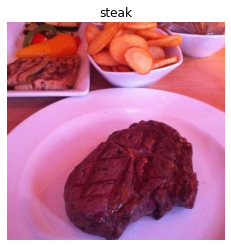

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

['1544197.jpg']
Image shape: (384, 512, 3)


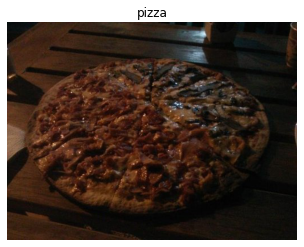

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 5, 14, 13],
        [ 7, 16, 15],
        [ 8, 17, 16],
        ...,
        [42, 42, 34],
        [42, 42, 34],
        [37, 37, 29]],

       [[ 4, 13, 12],
        [ 6, 15, 14],
        [ 7, 16, 15],
        ...,
        [45, 42, 35],
        [48, 48, 40],
        [48, 48, 38]],

       [[ 4, 13, 12],
        [ 5, 14, 13],
        [ 6, 15, 14],
        ...,
        [40, 37, 28],
        [50, 47, 38],
        [55, 52, 43]],

       ...,

       [[64, 32, 17],
        [62, 33, 17],
        [61, 32, 16],
        ...,
        [17, 18, 12],
        [15, 16, 10],
        [11, 12,  6]],

       [[68, 36, 21],
        [66, 37, 21],
        [65, 36, 20],
        ...,
        [14, 15,  9],
        [14, 15,  9],
        [13, 14,  8]],

       [[69, 37, 22],
        [67, 38, 22],
        [66, 37, 21],
        ...,
        [13, 14,  8],
        [16, 17, 11],
        [17, 18, 12]]], dtype=uint8)>

In [ ]:
img.shape # returns width, height, and colour channels

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.0

array([[[0.01960784, 0.05490196, 0.05098039],
        [0.02745098, 0.0627451 , 0.05882353],
        [0.03137255, 0.06666667, 0.0627451 ],
        ...,
        [0.16470588, 0.16470588, 0.13333333],
        [0.16470588, 0.16470588, 0.13333333],
        [0.14509804, 0.14509804, 0.11372549]],

       [[0.01568627, 0.05098039, 0.04705882],
        [0.02352941, 0.05882353, 0.05490196],
        [0.02745098, 0.0627451 , 0.05882353],
        ...,
        [0.17647059, 0.16470588, 0.1372549 ],
        [0.18823529, 0.18823529, 0.15686275],
        [0.18823529, 0.18823529, 0.14901961]],

       [[0.01568627, 0.05098039, 0.04705882],
        [0.01960784, 0.05490196, 0.05098039],
        [0.02352941, 0.05882353, 0.05490196],
        ...,
        [0.15686275, 0.14509804, 0.10980392],
        [0.19607843, 0.18431373, 0.14901961],
        [0.21568627, 0.20392157, 0.16862745]],

       ...,

       [[0.25098039, 0.1254902 , 0.06666667],
        [0.24313725, 0.12941176, 0.06666667],
        [0.23921569, 0

## An end to end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

#Set up path to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10,  3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5770 - accuracy: 0.6827 - val_loss: 0.4038 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4326 - accuracy: 0.8053 - val_loss: 0.3801 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3819 - accuracy: 0.8353 - val_loss: 0.3104 - val_accuracy: 0.8880
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3394 - accuracy: 0.8613 - val_loss: 0.3356 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3035 - accuracy: 0.8700 - val_loss: 0.3103 - val_accuracy: 0.8740


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before 

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the Tensorflow Playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 1.2696 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 4)                 602116    
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...Let's try to improve it

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 3.6612 - accuracy: 0.6393 - val_loss: 1.3972 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.8564 - accuracy: 0.6920 - val_loss: 0.4511 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6765 - accuracy: 0.7360 - val_loss: 0.4289 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5408 - accuracy: 0.7553 - val_loss: 0.5236 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5114 - accuracy: 0.7640 - val_loss: 0.4810 - val_accuracy: 0.7480


In [ ]:
# Let's get a summary of our model_3
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15000000/31000

483.8709677419355

Convolutional Neural Network is really powerful! 🙂

## Binary classification: Let's break it down

1. Become one with the data (visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)

### 1. Become one with the data

['447557.jpg']
Image shape: (512, 382, 3)
['3871666.jpg']
Image shape: (512, 512, 3)


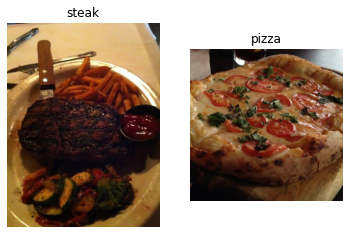

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for the model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all images at once, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. Too many images might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in all images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our iamge data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224), #Target size of (height, width)
                                               class_mode = "binary", #Type of data
                                               batch_size = 32) #Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images and the first shape
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
#  View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginnning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite number of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce more complexity

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline. a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10, #filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size = 10, # the size of the sliding window going across an input
           strides = 1, # the size of the step the sliding window takes across an input
           padding = "valid", 
           activation = "relu",
           input_shape = (224, 224, 3)), # input layer (specify output shape)
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") # output layer
])

In [ ]:
# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 215, 215, 10)      3010      
                                                                 
 conv2d_21 (Conv2D)          (None, 213, 213, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 211, 211, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 445210)            0         
                                                                 
 dense_12 (Dense)            (None, 1)                 445211    
                                                                 
Total params: 450,041
Trainable params: 450,041
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 212ms/step - loss: 0.7607 - accuracy: 0.5527 - val_loss: 0.5812 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.5413 - accuracy: 0.7467 - val_loss: 0.5259 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5074 - accuracy: 0.7733 - val_loss: 0.4402 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4701 - accuracy: 0.7867 - val_loss: 0.4299 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4357 - accuracy: 0.8100 - val_loss: 0.4096 - val_accuracy: 0.8320


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it 

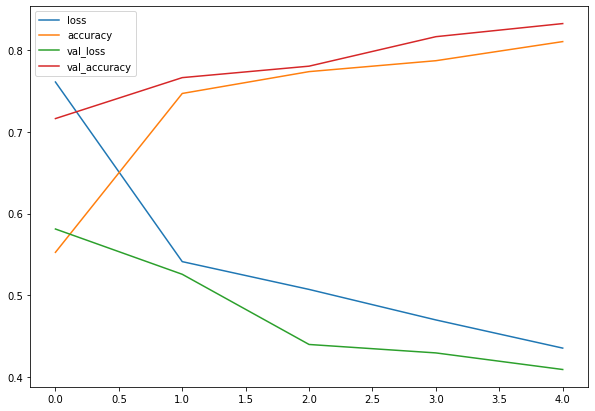

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

**Note:** When a model's validation loss starts to increase, it's likely that the model is **overfitting** the training dataset.

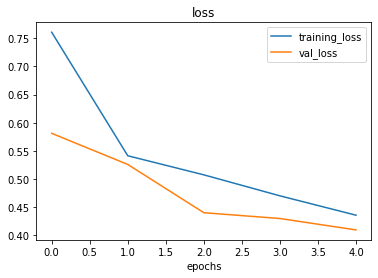

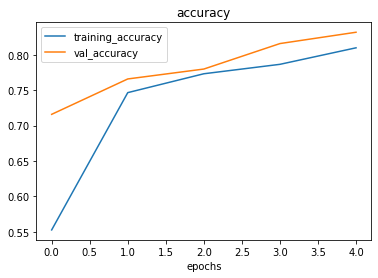

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to reduce overfitting:
* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5814 - accuracy: 0.6993 - val_loss: 0.4350 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4406 - accuracy: 0.8020 - val_loss: 0.3610 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4230 - accuracy: 0.8207 - val_loss: 0.3746 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3879 - accuracy: 0.8373 - val_loss: 0.3731 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3511 - accuracy: 0.8567 - val_loss: 0.3045 - val_accuracy: 0.8680


In [ ]:
# Get a summary
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 flatten_8 (Flatten)         (None, 27040)            

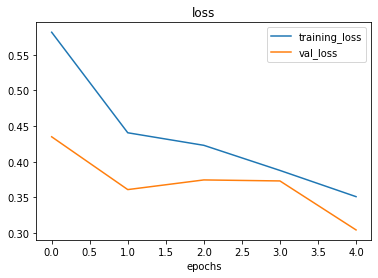

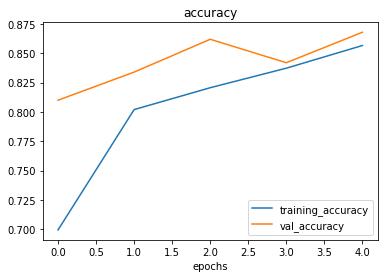

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.0,
                                             rotation_range=40, # how much rotation?
                                             shear_range = 0.2, # how much do you want to shear?
                                             zoom_range = 0.2, # how much do you want to zoom?
                                             width_shift_range = 0.2, # move your image around on x-axis
                                             height_shift_range = 0.2, # move your image around on y-axis
                                             horizontal_flip = True) # do you want to flip?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.0)

# Create ImageDataGenerator without data augmentation for the test data
test_datagen = ImageDataGenerator(rescale = 1/255.0)

❓**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, etc.

Let's write some code to visualize data augmentation

In [ ]:
# Import data and augment it from training directory
IMG_SIZE = (224,224)
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = IMG_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) # for demonstration

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded in to the model.

Finally...let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented


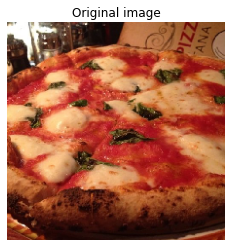

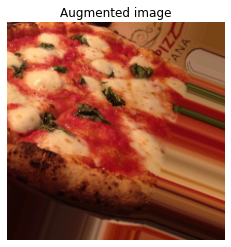

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Let's see how our model performs on augmented data

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 458ms/step - loss: 0.7017 - accuracy: 0.4127 - val_loss: 0.6858 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6906 - accuracy: 0.5827 - val_loss: 0.6656 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6489 - accuracy: 0.6927 - val_loss: 0.7122 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 21s 451ms/step - loss: 0.7043 - accuracy: 0.5007 - val_loss: 0.6258 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6435 - accuracy: 0.6453 - val_loss: 0.5365 - val_accuracy: 0.7220


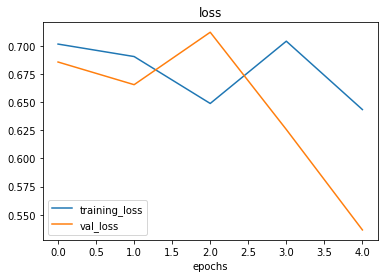

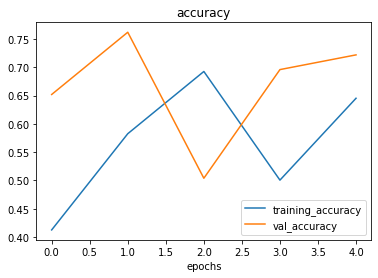

In [ ]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle it from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size = (224,224),
                                                                           class_mode = "binary",
                                                                           batch_size = 32,
                                                                           shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_6)
model_7 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_7.fit(train_data_augmented_shuffle,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented_shuffle),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6244 - accuracy: 0.6493 - val_loss: 0.4273 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5214 - accuracy: 0.7473 - val_loss: 0.4336 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5010 - accuracy: 0.7580 - val_loss: 0.4164 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4664 - accuracy: 0.7820 - val_loss: 0.3531 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4577 - accuracy: 0.7927 - val_loss: 0.3318 - val_accuracy: 0.8600


**Note:** when shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few thigns we could try to improve our model:

* Increase the number of model layers 
* Increase the number of filters in each convolutional layer (10 to 32 to 64)
* Train for longer (more epochs)
* Find an ideal learning rate (although currently default is pretty good)
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_8 = Sequential([
    Conv2D(64, 3, input_shape = (224, 224, 3)),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(64, 3, activation = "relu"),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_8.fit(train_data_augmented_shuffle,
            epochs = 10,
            steps_per_epoch = len(train_data_augmented_shuffle),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 513ms/step - loss: 0.6613 - accuracy: 0.6233 - val_loss: 0.5094 - val_accuracy: 0.7560
Epoch 2/10
47/47 [==============================] - 24s 508ms/step - loss: 0.5268 - accuracy: 0.7447 - val_loss: 0.3698 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 24s 508ms/step - loss: 0.4790 - accuracy: 0.7780 - val_loss: 0.4043 - val_accuracy: 0.8200
Epoch 4/10
47/47 [==============================] - 24s 509ms/step - loss: 0.5067 - accuracy: 0.7707 - val_loss: 0.4393 - val_accuracy: 0.8040
Epoch 5/10
47/47 [==============================] - 24s 518ms/step - loss: 0.4998 - accuracy: 0.7633 - val_loss: 0.3427 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 24s 507ms/step - loss: 0.4523 - accuracy: 0.7953 - val_loss: 0.3472 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 24s 506ms/step - loss: 0.4625 - accuracy: 0.8080 - val_loss: 0.3409 - val_accuracy: 0.8620

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2022-10-04 22:54:36--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.7’

03-steak.jpeg.7         [ <=>                ] 143.08K  --.-KB/s    in 0.008s  

2022-10-04 22:54:37 (17.4 MB/s) - ‘03-steak.jpeg.7’ saved [146513]



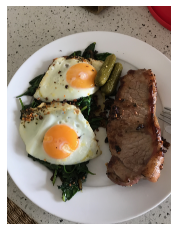

In [ ]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis = 0))
pred

array([[0.7224527]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


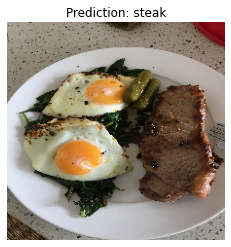

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Our model works! Let's try it on another image...this time pizza 🍕

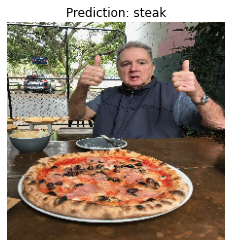

In [ ]:
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

Looks like our prediction is wrong this time!

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-06 22:12:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   135MB/s    in 3.8s    

2022-10-06 22:12:23 (130 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walkthrough 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [ ]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualize!!!
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view images)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")# show the shape of the image

  return img

['363240.jpg']
Image shape: (384, 512, 3)


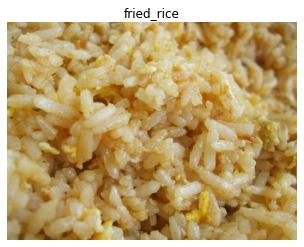

In [ ]:

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

## 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a baseline model
### 4. Fit the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, input_shape = (224,224,3)),
    Activation(activation = "relu"),
    Conv2D(filters = 10, kernel_size = 3),
    Activation(activation = "relu"),
    MaxPool2D(),
    Conv2D(filters = 10, kernel_size = 3),
    Activation(activation = "relu"),
    Conv2D(filters = 10, kernel_size = 3),
    Activation(activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation(activation = "softmax")
])

model_1.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data, # Now 10 different clases
            epochs = 10, 
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 66s 240ms/step - loss: 2.0692 - accuracy: 0.2525 - val_loss: 2.0087 - val_accuracy: 0.2728
Epoch 2/10
235/235 [==============================] - 57s 241ms/step - loss: 1.8498 - accuracy: 0.3645 - val_loss: 1.8485 - val_accuracy: 0.3524
Epoch 3/10
235/235 [==============================] - 60s 254ms/step - loss: 1.5280 - accuracy: 0.4905 - val_loss: 1.9686 - val_accuracy: 0.3592
Epoch 4/10
235/235 [==============================] - 66s 281ms/step - loss: 1.0000 - accuracy: 0.6700 - val_loss: 2.2759 - val_accuracy: 0.3268
Epoch 5/10
235/235 [==============================] - 49s 208ms/step - loss: 0.4568 - accuracy: 0.8520 - val_loss: 3.1286 - val_accuracy: 0.2992
Epoch 6/10
235/235 [==============================] - 47s 201ms/step - loss: 0.1524 - accuracy: 0.9584 - val_loss: 4.5437 - val_accuracy: 0.2992
Epoch 7/10
235/235 [==============================] - 48s 202ms/step - loss: 0.0559 - accuracy: 0.9857 - val_loss: 5.0347 - val_ac

### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 6.2934 - accuracy: 0.2716


[6.293379306793213, 0.27160000801086426]

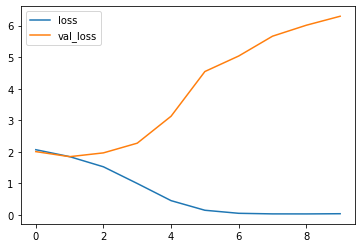

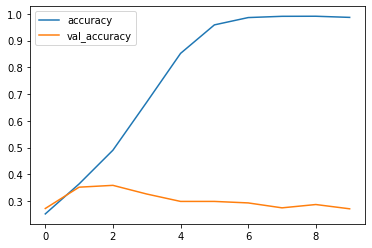

In [ ]:
# Check out the model's loss curves
import pandas as pd
def plot_loss_curves(history):
  """
  Plots the loss curve of our model.
  """
  history_frame = pd.DataFrame(history.history)
  history_frame.loc[:, ['loss', 'val_loss']].plot()
  history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

plot_loss_curves(history_1)

It looks like our model is **overfitting** the training set quite badly 😞

### 6. Adjust the model hyperparameters to beat the baseline/reduce overfitting

Let's reduce overfitting by...
1. **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
2. **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model => reduce the number of layers or reduce the number of hidden units in layers
3. **Use data augmentation** - manipulates the training data in such a way to add more diversity to it without altering the original data
4. **Use transfer learning** - transfer learning leverages the patterns another model has learned ofa  similar data to your own and allows you to use those patterns on your own dataset


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

In [ ]:
# Let's try to simplify our model first
# Let's try to remove 2 convolutional layers...
model_2 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
# Fit the model with 2x conv layers removed and less epochs
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 189ms/step - loss: 2.0876 - accuracy: 0.2607 - val_loss: 1.8969 - val_accuracy: 0.3260
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.7290 - accuracy: 0.4151 - val_loss: 1.8533 - val_accuracy: 0.3588
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.3492 - accuracy: 0.5585 - val_loss: 1.9796 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 0.8573 - accuracy: 0.7343 - val_loss: 2.2875 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 0.4332 - accuracy: 0.8816 - val_loss: 2.9160 - val_accuracy: 0.2964


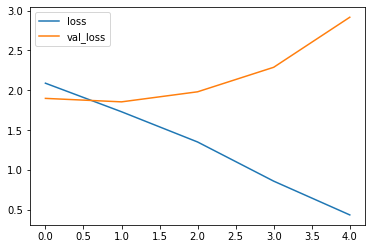

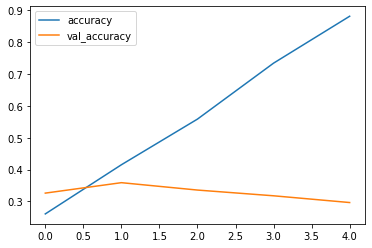

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

Looks like our "simplifying the model" experiment barely worked. Overfitting continued...

Let's try data augmentation

### Trying to reduce overfitting with data augmentation

* We want to reduce overfitting
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range=0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's fit a model on the augmented training data
model_3 = tf.keras.models.clone_model(model_2)
model_3.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 117s 493ms/step - loss: 2.3110 - accuracy: 0.1363 - val_loss: 2.2121 - val_accuracy: 0.1828
Epoch 2/5
235/235 [==============================] - 109s 463ms/step - loss: 2.2174 - accuracy: 0.1861 - val_loss: 2.1440 - val_accuracy: 0.2136
Epoch 3/5
235/235 [==============================] - 111s 471ms/step - loss: 2.1600 - accuracy: 0.2135 - val_loss: 2.0608 - val_accuracy: 0.2516
Epoch 4/5
235/235 [==============================] - 111s 474ms/step - loss: 2.1002 - accuracy: 0.2492 - val_loss: 1.9680 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0395 - accuracy: 0.2839 - val_loss: 1.9392 - val_accuracy: 0.3228


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 19s 238ms/step - loss: 2.9160 - accuracy: 0.2964


[2.91601300239563, 0.2964000105857849]

In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 14s 174ms/step - loss: 1.9392 - accuracy: 0.3228


[1.9392417669296265, 0.32280001044273376]

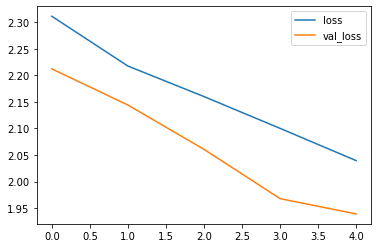

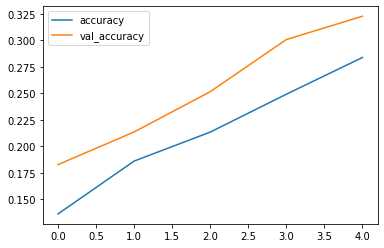

In [ ]:
# Check out loss curves
plot_loss_curves(history_3)

It seems better. Our loss curves are closer to each other. 

### 7. Repeat until satisfied

In [ ]:
model_4 = Sequential([
    Conv2D(32, 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation = "relu"),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_4.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
model_4.fit(train_data_augmented,
            epochs = 10,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 116s 493ms/step - loss: 2.2214 - accuracy: 0.1796 - val_loss: 2.1462 - val_accuracy: 0.1968
Epoch 2/10
235/235 [==============================] - 115s 490ms/step - loss: 2.1048 - accuracy: 0.2433 - val_loss: 2.0078 - val_accuracy: 0.2732
Epoch 3/10
235/235 [==============================] - 116s 492ms/step - loss: 2.0696 - accuracy: 0.2557 - val_loss: 1.9305 - val_accuracy: 0.3204
Epoch 4/10
235/235 [==============================] - 114s 484ms/step - loss: 2.0317 - accuracy: 0.2857 - val_loss: 1.8970 - val_accuracy: 0.3216
Epoch 5/10
235/235 [==============================] - 117s 496ms/step - loss: 1.9732 - accuracy: 0.3068 - val_loss: 1.7697 - val_accuracy: 0.3956
Epoch 6/10
235/235 [==============================] - 118s 502ms/step - loss: 1.9200 - accuracy: 0.3344 - val_loss: 1.7318 - val_accuracy: 0.4076
Epoch 7/10
235/235 [==============================] - 114s 486ms/step - loss: 1.8834 - accuracy: 0.3484 - val_loss: 1.7073 -

### Making prediction with our trained model

In [ ]:
class_names  

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg



--2022-10-06 23:58:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2022-10-06 23:58:32 (77.4 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-10-06 23:58:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

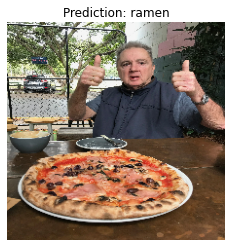

In [ ]:
# Make a prediction using model_4
pred_and_plot(model = model_4,
              filename = "03-pizza-dad.jpeg",
              class_names=class_names)

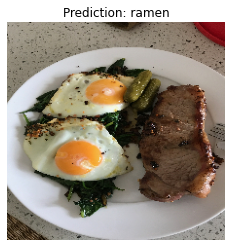

In [ ]:
pred_and_plot(model = model_4,
              filename = "03-steak.jpeg",
              class_names=class_names)

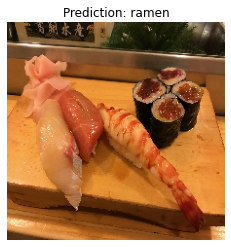

In [ ]:
pred_and_plot(model = model_4,
              filename = "03-sushi.jpeg",
              class_names=class_names)

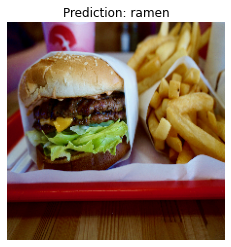

In [ ]:
pred_and_plot(model = model_4,
              filename = "03-hamburger.jpeg",
              class_names=class_names)

Looks like our model isn't performing very well... 😞

## Saving and loading our model

In [ ]:
# Save a model
model_4.save("saved_trained_model_4")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_4 = tf.keras.models.load_model("saved_trained_model_4")
loaded_model_4.evaluate(test_data)

79/79 [==============================] - 14s 172ms/step - loss: 1.8413 - accuracy: 0.4156


[1.8413015604019165, 0.4156000018119812]

In [ ]:
# compare our loaded model to our existing model
model_4.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 1.8413 - accuracy: 0.4156


[1.8413009643554688, 0.4156000018119812]